In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
path = "Final_Billionaires_Statistics.csv"

# Importing data file
df = pd.read_csv(path)
df

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,latitude_country,longitude_country,Marital Status,Children,Education,Bachelor,Master,Doctorate,Drop Out,Self Made
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,46.227638,2.213749,Married,5.0,"Bachelor of Arts/Science, Ecole Polytechnique ...",1.0,0.0,0.0,0.0,0
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,37.090240,-95.712891,Single,10.0,"Bachelor of Arts/Science, University of Pennsy...",1.0,0.0,0.0,0.0,1
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,37.090240,-95.712891,Engaged,4.0,"Bachelor of Arts/Science, Princeton University",1.0,0.0,0.0,0.0,1
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,37.090240,-95.712891,In Relationship,4.0,"Drop Out, University of Chicago; Drop Out, Uni...",0.0,0.0,0.0,1.0,1
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,37.090240,-95.712891,"Widowed, Remarried",3.0,"Master of Science, Columbia University; Bachel...",1.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,2636,1000,Healthcare,Yu Rong,51.0,China,Shanghai,Health clinics,Healthcare,China,...,35.861660,104.195397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2636,2637,1000,Food & Beverage,"Richard Yuengling, Jr.",80.0,United States,Pottsville,Beer,Food & Beverage,United States,...,37.090240,-95.712891,Divorced,4.0,"Drop Out, Lycoming College",0.0,0.0,0.0,1.0,0
2637,2638,1000,Manufacturing,Zhang Gongyun,60.0,China,Gaomi,Tyre manufacturing machinery,Manufacturing,China,...,35.861660,104.195397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2638,2639,1000,Real Estate,Zhang Guiping & family,71.0,China,Nanjing,Real estate,Real Estate,China,...,35.861660,104.195397,Married,1.0,"Bachelor of Arts/Science, South East University",1.0,0.0,0.0,0.0,1


In [2]:
# Cleanup

# convert final worth to billions
df["finalWorth"] = 1000000 * df["finalWorth"]

# Reformat gdp_country field to remove dollars and commas and convert to integer
df['gdp_country'] = df['gdp_country'].str.replace('$', '')
df['gdp_country'] = df['gdp_country'].str.replace(',', '')
df['gdp_country'] = df['gdp_country'].fillna(0)
df['gdp_country'] = df['gdp_country'].astype(int)

df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,latitude_country,longitude_country,Marital Status,Children,Education,Bachelor,Master,Doctorate,Drop Out,Self Made
0,1,211000000000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,46.227638,2.213749,Married,5.0,"Bachelor of Arts/Science, Ecole Polytechnique ...",1.0,0.0,0.0,0.0,0
1,2,180000000000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,37.090240,-95.712891,Single,10.0,"Bachelor of Arts/Science, University of Pennsy...",1.0,0.0,0.0,0.0,1
2,3,114000000000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,37.090240,-95.712891,Engaged,4.0,"Bachelor of Arts/Science, Princeton University",1.0,0.0,0.0,0.0,1
3,4,107000000000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,37.090240,-95.712891,In Relationship,4.0,"Drop Out, University of Chicago; Drop Out, Uni...",0.0,0.0,0.0,1.0,1
4,5,106000000000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,37.090240,-95.712891,"Widowed, Remarried",3.0,"Master of Science, Columbia University; Bachel...",1.0,1.0,0.0,0.0,1


In [3]:
# Count billionaires and group by country
bill_count = df.groupby(df['country'])['personName'].count()
country_df = pd.DataFrame()
country_df["billionaires"] = bill_count
country_df.reset_index()


# Sum net worth by country
country_df["total net worth"] = df.groupby(df['country'])['finalWorth'].sum()

# Lowest net worth by country
country_df["lowest net worth"] = df.groupby(df['country'])['finalWorth'].min()

# Highest net worth by country
country_df["highest net worth"] = df.groupby(df['country'])['finalWorth'].max()

# Median net worth by country
pd.options.display.float_format= '{:.0f}'.format
country_df["median net worth"] = df.groupby(df['country'])['finalWorth'].median()

# Mean net worth by country
pd.options.display.float_format= '{:.0f}'.format
country_df["mean net worth"] = df.groupby(df['country'])['finalWorth'].mean()

# GDP each country and billionaire's total net worth compared to GDP
country_df["country gdp"] = df.groupby(df['country'])['gdp_country'].median()
country_df['percent to gdp'] = (country_df["total net worth"]/country_df["country gdp"]) * 100

# Number of self made billionaires by country
country_df["self made billionaires"] = df.groupby(df['country'])['Self Made'].sum()
country_df['percent of self made'] = (country_df["self made billionaires"]/country_df["billionaires"]) * 100

# Get country latitude and longitude
pd.options.display.float_format= '{:.8f}'.format
country_df["latitude"] = df.groupby(df['country'])['latitude_country'].min()
country_df["longitude"] = df.groupby(df['country'])['longitude_country'].min()

# Print the data frame
country_df = country_df.sort_values(by="billionaires", ascending=False).iloc[:20]

In [4]:
# Get top 20 countries with most billioniares
top_20_billion = country_df.sort_values(by="billionaires", ascending=False).iloc[:20]
top_20_billion.reset_index(inplace=True)
top_20_billion


,country,billionaires,total net worth,lowest net worth,highest net worth,median net worth,mean net worth,country gdp,percent to gdp,self made billionaires,percent of self made,latitude,longitude
0,United States,754,4575100000000,1000000000,180000000000,2900000000.00000000,6067771883.28912449,21427700000000.00000000,21.35133495,540,71.61803714,37.09024000,-95.71289100
1,China,523,1805500000000,1000000000,68000000000,1900000000.00000000,3452198852.77246666,19910000000000.00000000,9.06830738,506,96.74952199,35.86166000,104.19539700
2,India,157,628700000000,1000000000,83400000000,2100000000.00000000,4004458598.72611475,2611000000000.00000000,24.07889697,67,42.67515924,20.59368400,78.96288000
3,Germany,102,462100000000,1000000000,42900000000,2650000000.00000000,4530392156.86274529,3845630030824.00000000,12.01623652,31,30.39215686,51.16569100,10.45152600
4,United Kingdom,82,370700000000,1000000000,32100000000,2600000000.00000000,4520731707.31707287,2827113184696.00000000,13.11231549,58,70.73170732,55.37805100,-3.43597300
5,Russia,79,351000000000,1000000000,23700000000,2500000000.00000000,4443037974.68354416,1699876578871.00000000,20.64855792,79,100.00000000,61.52401000,105.31875600
6,Switzerland,78,409900000000,1100000000,39100000000,3100000000.00000000,5255128205.12820530,703082435360.00000000,58.30041818,44,56.41025641,46.81818800,8.22751200
7,Hong Kong,68,321500000000,1000000000,38000000000,2700000000.00000000,4727941176.47058868,0.00000000,inf,44,64.70588235,NaN,NaN
8,Italy,55,156900000000,1000000000,11100000000,2300000000.00000000,2852727272.72727251,2001244392042.00000000,7.84012191,24,43.63636364,41.87194000,12.56738000
9,Singapore,46,138000000000,1000000000,14300000000,2150000000.00000000,3000000000.00000000,372062527489.00000000,37.09053984,29,63.04347826,1.35208300,103.81983600


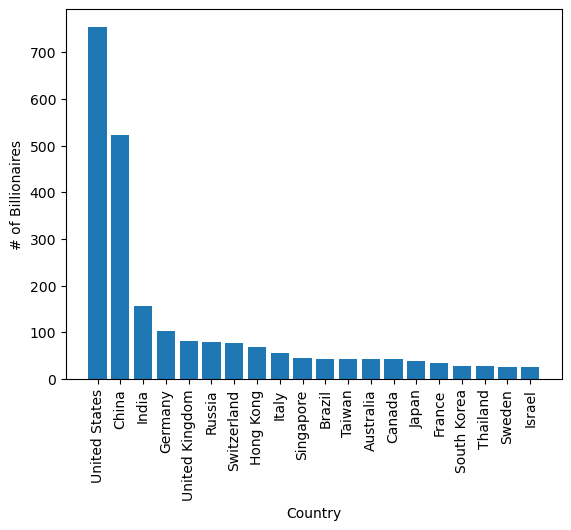

In [5]:
# Plot top 20 countries with most billioniares using bar chart
billionaires = top_20_billion["billionaires"]
country_name = top_20_billion["country"]

plt.bar(country_name, billionaires)
plt.xlabel("Country")
plt.ylabel("# of Billionaires")

plt.xticks(rotation=90)
plt.show()
plt.savefig("output_data/country_most.png")

# Countries With the Most Individual Billionaires

When examining the top 20 countries with the most billionaires, the United States comes out on top with 754 individual billionaires as of April 2023, followed by China, with 523. Of the top 20, only the US, China, India, and Germany have more than a 100 billionaires. 

In [6]:
# Get top 20 countries with highest total net worth
top_20_worth = country_df.sort_values(by="total net worth", ascending=False).iloc[:20]
top_20_worth.reset_index(inplace=True)
top_20_worth

,country,billionaires,total net worth,lowest net worth,highest net worth,median net worth,mean net worth,country gdp,percent to gdp,self made billionaires,percent of self made,latitude,longitude
0,United States,754,4575100000000,1000000000,180000000000,2900000000.00000000,6067771883.28912449,21427700000000.00000000,21.35133495,540,71.61803714,37.09024000,-95.71289100
1,China,523,1805500000000,1000000000,68000000000,1900000000.00000000,3452198852.77246666,19910000000000.00000000,9.06830738,506,96.74952199,35.86166000,104.19539700
2,India,157,628700000000,1000000000,83400000000,2100000000.00000000,4004458598.72611475,2611000000000.00000000,24.07889697,67,42.67515924,20.59368400,78.96288000
3,France,35,499500000000,1000000000,211000000000,4200000000.00000000,14271428571.42857170,2715518274227.00000000,18.39427872,15,42.85714286,46.22763800,2.21374900
4,Germany,102,462100000000,1000000000,42900000000,2650000000.00000000,4530392156.86274529,3845630030824.00000000,12.01623652,31,30.39215686,51.16569100,10.45152600
5,Switzerland,78,409900000000,1100000000,39100000000,3100000000.00000000,5255128205.12820530,703082435360.00000000,58.30041818,44,56.41025641,46.81818800,8.22751200
6,United Kingdom,82,370700000000,1000000000,32100000000,2600000000.00000000,4520731707.31707287,2827113184696.00000000,13.11231549,58,70.73170732,55.37805100,-3.43597300
7,Russia,79,351000000000,1000000000,23700000000,2500000000.00000000,4443037974.68354416,1699876578871.00000000,20.64855792,79,100.00000000,61.52401000,105.31875600
8,Hong Kong,68,321500000000,1000000000,38000000000,2700000000.00000000,4727941176.47058868,0.00000000,inf,44,64.70588235,NaN,NaN
9,Canada,42,173900000000,1000000000,54400000000,2200000000.00000000,4140476190.47619057,1736425629520.00000000,10.01482569,30,71.42857143,56.13036600,-106.34677100


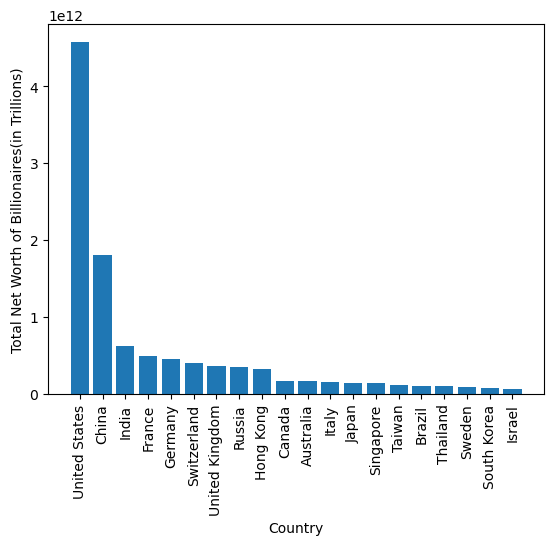

In [7]:
# Plot top 20 countries with highest total net worth using bar chart
worth = top_20_worth["total net worth"]
country_name2 = top_20_worth["country"]

plt.bar(country_name2, worth)
plt.xlabel("Country")
plt.ylabel("Total Net Worth of Billionaires(in Trillions)")

plt.xticks(rotation=90)
plt.show()
plt.savefig("output_data/country_highest.png")

# Countries with the Highest Total Net Worth of Billionairs

When adding up the total net worth of billionaires, the United States and China again take first and second place. Billionaires in the United States had a total net worth of $4,575,100,000,000 while China's Billionaires had a total net worth of $1,805,500,000,000, making the US and China the only two countries with a combined net worth of over $1 trillion.  

While the United States had 36.2% more Billionaires than China, it had 86.6% higher total net worth. This is due to the significantly higher median net worth of Billionaires in the United States at $2,900,000,000 compared to China's $1,900,000,000. 

It should be noted that the United States does not have the highest median net worth among billionaires. That title goes to France, with a median net worth of $4,200,000,000.

In [8]:
# Get top 20 countries with highest total net worth compared to country gdp
top_20_gdp = country_df[country_df["country gdp"] != 0]
top_20_gdp = top_20_gdp.sort_values(by="percent to gdp", ascending=False).iloc[:20]
top_20_gdp.reset_index(inplace=True)
top_20_gdp

,country,billionaires,total net worth,lowest net worth,highest net worth,median net worth,mean net worth,country gdp,percent to gdp,self made billionaires,percent of self made,latitude,longitude
0,Switzerland,78,409900000000,1100000000,39100000000,3100000000.00000000,5255128205.12820530,703082435360.00000000,58.30041818,44,56.41025641,46.81818800,8.22751200
1,Singapore,46,138000000000,1000000000,14300000000,2150000000.00000000,3000000000.00000000,372062527489.00000000,37.09053984,29,63.04347826,1.35208300,103.81983600
2,India,157,628700000000,1000000000,83400000000,2100000000.00000000,4004458598.72611475,2611000000000.00000000,24.07889697,67,42.67515924,20.59368400,78.96288000
3,United States,754,4575100000000,1000000000,180000000000,2900000000.00000000,6067771883.28912449,21427700000000.00000000,21.35133495,540,71.61803714,37.09024000,-95.71289100
4,Russia,79,351000000000,1000000000,23700000000,2500000000.00000000,4443037974.68354416,1699876578871.00000000,20.64855792,79,100.00000000,61.52401000,105.31875600
5,Thailand,28,100700000000,1100000000,14900000000,1950000000.00000000,3596428571.42857122,543649976166.00000000,18.52294756,14,50.00000000,15.87003200,100.99254100
6,France,35,499500000000,1000000000,211000000000,4200000000.00000000,14271428571.42857170,2715518274227.00000000,18.39427872,15,42.85714286,46.22763800,2.21374900
7,Israel,26,72500000000,1000000000,11300000000,1950000000.00000000,2788461538.46153831,395098666122.00000000,18.34984681,19,73.07692308,31.04605100,34.85161200
8,Sweden,26,90900000000,1000000000,16200000000,2150000000.00000000,3496153846.15384626,530832908738.00000000,17.12403254,13,50.00000000,60.12816100,18.64350100
9,United Kingdom,82,370700000000,1000000000,32100000000,2600000000.00000000,4520731707.31707287,2827113184696.00000000,13.11231549,58,70.73170732,55.37805100,-3.43597300


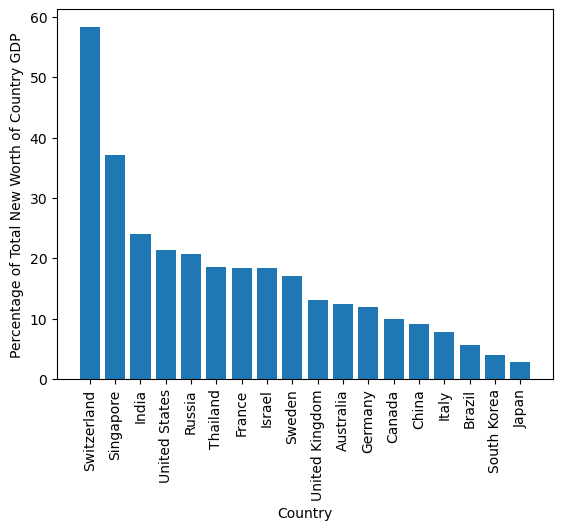

In [9]:
# Plot top 20 countries with highest total net worth compared to country gdp
percent_gdp = top_20_gdp["percent to gdp"]
country_name3 = top_20_gdp["country"]

plt.bar(country_name3, percent_gdp)
plt.xlabel("Country")
plt.ylabel("Percentage of Total New Worth of Country GDP")

plt.xticks(rotation=90)
plt.show()
plt.savefig("output_data/country_gdp.png")

# Countries with the Highest Total Net Worth Compared to GDP

When comparing country GDP to the total net worth of billionaires in that country, Switzerland's 78 billionaires make up 58.3%. While Singapore's 46 billionaires make up 37.1%. The United States 754 billionaires make up 21.4%. Only 13 countries have billionaires that exceed the 10% of GDP threshold. 

In [10]:
# Get top 20 countries with highest percentage of self made billionaires
top_20_self = country_df.sort_values(by="percent of self made", ascending=False).iloc[:20]
top_20_self.reset_index(inplace=True)
top_20_self


,country,billionaires,total net worth,lowest net worth,highest net worth,median net worth,mean net worth,country gdp,percent to gdp,self made billionaires,percent of self made,latitude,longitude
0,Russia,79,351000000000,1000000000,23700000000,2500000000.00000000,4443037974.68354416,1699876578871.00000000,20.64855792,79,100.00000000,61.52401000,105.31875600
1,China,523,1805500000000,1000000000,68000000000,1900000000.00000000,3452198852.77246666,19910000000000.00000000,9.06830738,506,96.74952199,35.86166000,104.19539700
2,Japan,38,146800000000,1000000000,32600000000,1700000000.00000000,3863157894.73684216,5081769542380.00000000,2.88875752,29,76.31578947,36.20482400,138.25292400
3,Israel,26,72500000000,1000000000,11300000000,1950000000.00000000,2788461538.46153831,395098666122.00000000,18.34984681,19,73.07692308,31.04605100,34.85161200
4,United States,754,4575100000000,1000000000,180000000000,2900000000.00000000,6067771883.28912449,21427700000000.00000000,21.35133495,540,71.61803714,37.09024000,-95.71289100
5,Canada,42,173900000000,1000000000,54400000000,2200000000.00000000,4140476190.47619057,1736425629520.00000000,10.01482569,30,71.42857143,56.13036600,-106.34677100
6,United Kingdom,82,370700000000,1000000000,32100000000,2600000000.00000000,4520731707.31707287,2827113184696.00000000,13.11231549,58,70.73170732,55.37805100,-3.43597300
7,Australia,43,173500000000,1100000000,27000000000,2000000000.00000000,4034883720.93023252,1392680589329.00000000,12.45798939,29,67.44186047,-25.27439800,133.77513600
8,Hong Kong,68,321500000000,1000000000,38000000000,2700000000.00000000,4727941176.47058868,0.00000000,inf,44,64.70588235,NaN,NaN
9,Singapore,46,138000000000,1000000000,14300000000,2150000000.00000000,3000000000.00000000,372062527489.00000000,37.09053984,29,63.04347826,1.35208300,103.81983600


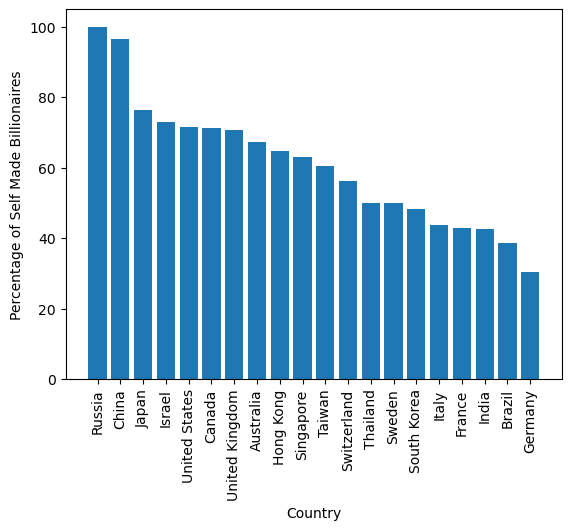

In [11]:
# Plot top 20 countries with highest percentage of self made billionaires
percent_self = top_20_self["percent of self made"]
country_name4 = top_20_self["country"]

plt.bar(country_name4, percent_self)
plt.xlabel("Country")
plt.ylabel("Percentage of Self Made Billionaires")

plt.xticks(rotation=90)
plt.show()
plt.savefig("output_data/country_self.png")

# Countries with the Highest Percentage of Self Made Billionaires

Examining the percentage of billionaires in each country that are self made, that is they are first generation billionaires, all 79 or 100% of Russia's billionaires are self made. This is followed by China, with 96.7% of China's 523 billionaires being self made. Of the United States 754 billionaires, 71.6% are self made. 